In [26]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [27]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
X = iris.data
Y = iris.target
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
iris_target = DataFrame(Y,columns = ['Species'])
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num ==1:
        return 'Versicolour'
    else:
        return 'Virginica'
iris_target['Species'] = iris_target['Species'].apply(flower)

In [13]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [14]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


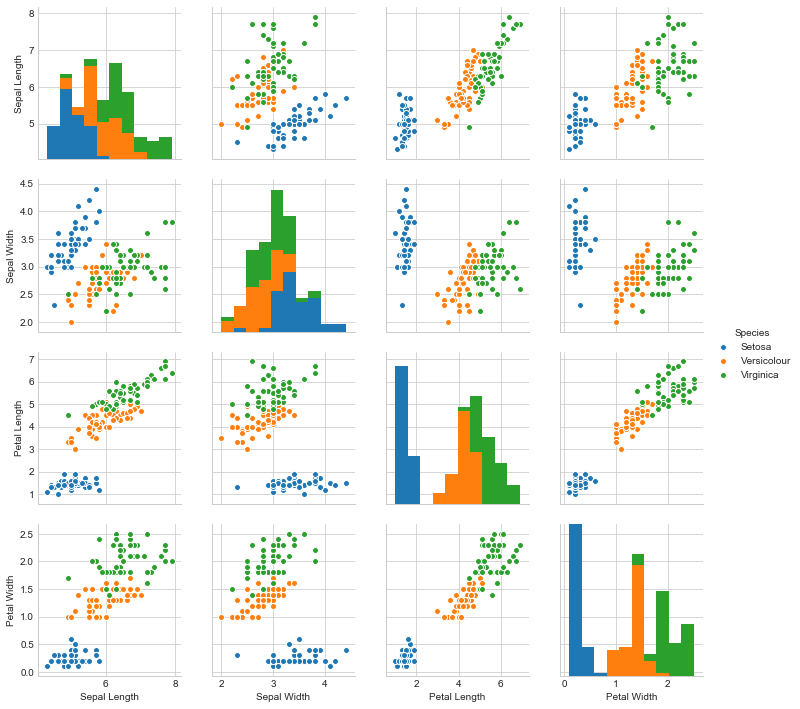

In [15]:
sns.pairplot(iris,hue='Species')

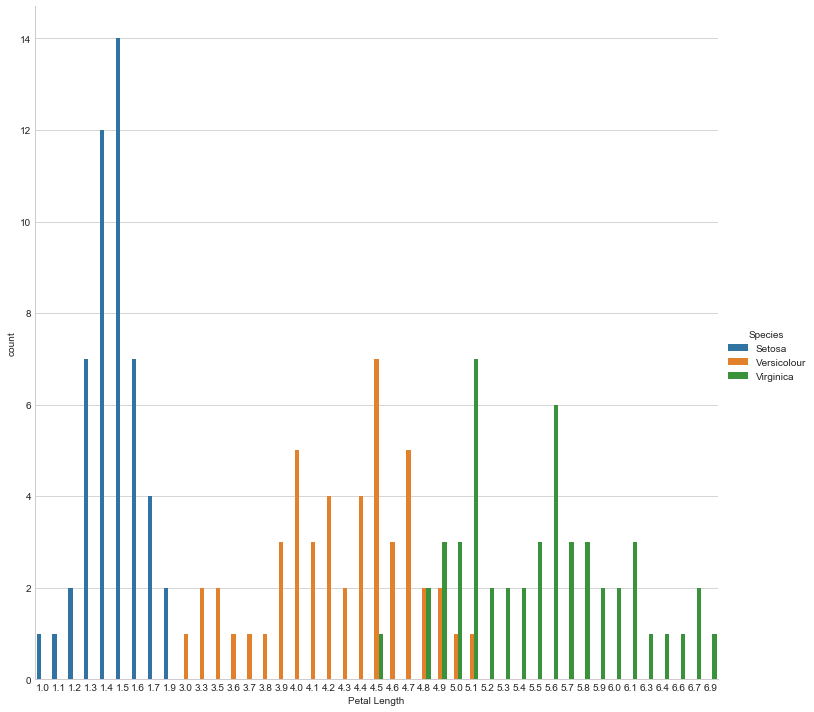

In [17]:
sns.factorplot('Petal Length',data=iris,kind='count',hue='Species',size=10)

Text(0.5,1,'Regression Graph')

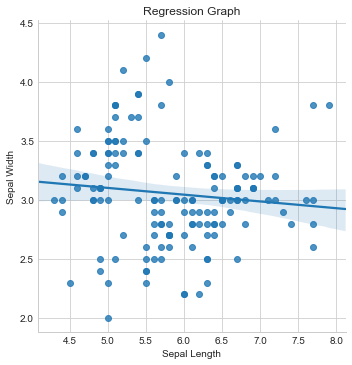

In [22]:
sns.lmplot(data=iris,x='Sepal Length',y='Sepal Width')
plt.title('Regression Graph')

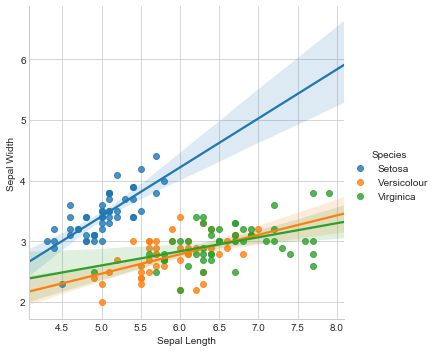

In [21]:
sns.lmplot(data=iris, x='Sepal Length', y='Sepal Width', hue='Species')

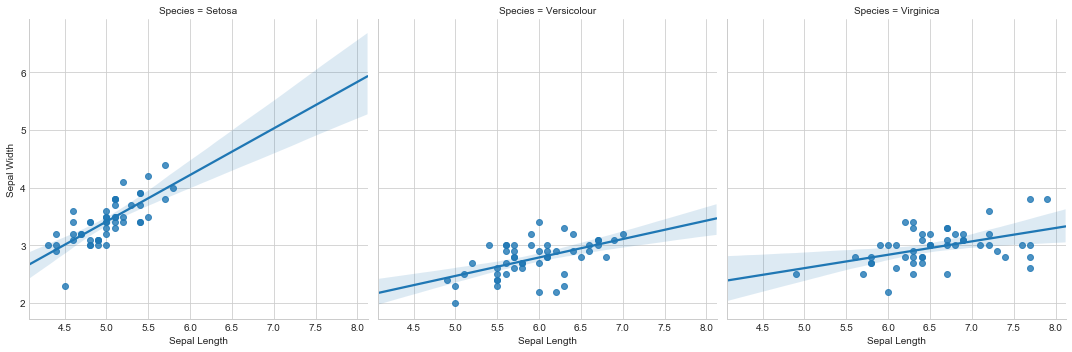

In [23]:
sns.lmplot(data=iris, x='Sepal Length', y='Sepal Width', col='Species')

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
logreg = LogisticRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
from sklearn import metrics
Y_pred = logreg.predict(X_test)

In [31]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9333333333333333


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

0.95


In [34]:
k_range = range(1,21)
accuracy=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0,0.5,'Accuracy')

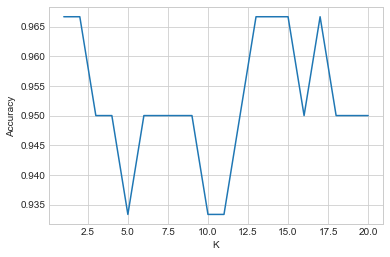

In [35]:
plt.plot(k_range,accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')